In [217]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import GlorotUniform
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import cv2


INIT = GlorotUniform()
IMG_WIDTH = 6
IMG_HEIGHT = 6

In [218]:
x_train = list()
x_1 = [[1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1]]

x_2 = [[0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0]]

x_train.append(x_1)
x_train.append(x_2)
x_train = np.array(x_train)

y_train = list()
y_train.append([0,1])
y_train.append([1,0])
y_train = np.array(y_train)

C:\Users\Tomas\AppData\Local\Temp/ipykernel_17252/3104741797.py:3: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



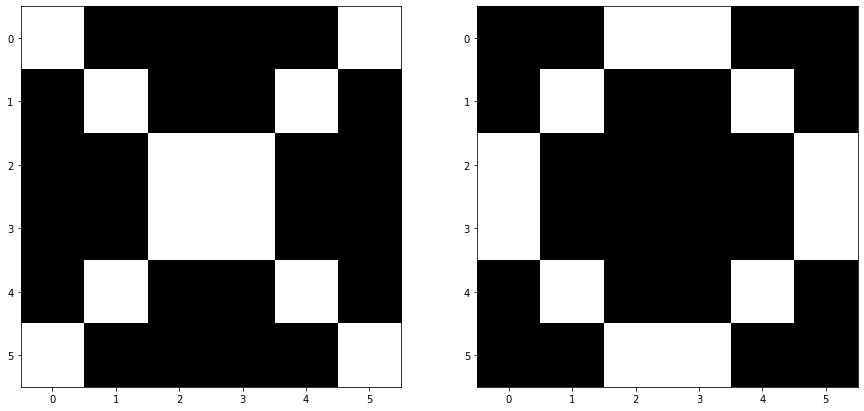

In [219]:
#with 7 layers
plt.figure(figsize=(15, 10))
axes = np.zeros((1,2),dtype=np.object)
axes[0,0] = plt.subplot(1, 2, 1)
axes[0,1] = plt.subplot(1, 2, 2)

axes[0,0].imshow(x_1, cmap = 'gray')
axes[0,1].imshow(x_2, cmap = 'gray')

In [220]:
def create_model():
    model=tf.keras.Sequential([
      tf.keras.layers.Conv2D(1, kernel_size = (3,3), activation='linear', input_shape=(IMG_WIDTH, IMG_HEIGHT,1),kernel_initializer=INIT),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='linear'),
      tf.keras.layers.Dense(2,activation='softmax')
    ]) # Mozete pridavat layers ako chcete
    return model

In [221]:
def weights_from_dense(w):
    w_to_return = list()
    for x in w[1]:
        w_to_return.append(x)
    for x in w[0]:
        for y in x:
            w_to_return.append(y)
    return w_to_return,w[1].shape[0]

In [222]:
def weights_from_conv(w):
    w_to_return = list()
    for x in w[1]:
        w_to_return.append(x)
    to_im_real = np.moveaxis(w[0], 3, 0)
    to_im_real = np.moveaxis(to_im_real[0], 2, 0)
    for x in to_im_real[0]:
        for y in x:
            w_to_return.append(y)
    return w_to_return,w[0].shape,w[1].shape[0]

In [223]:
def return_kernel_im(w):
    to_im_real = np.moveaxis(w[0], 3, 0)
    to_im_real = np.moveaxis(to_im_real[0], 2, 0)
    return to_im_real[0] + w[1]

In [224]:
def extract_path_of_learning(model):
    weights_ep = list()
    for i in range(20):
        weights = list()
        weights += weights_from_conv(model.layers[0].get_weights())[0]
        weights += weights_from_dense(model.layers[3].get_weights())[0]
        weights += weights_from_dense(model.layers[4].get_weights())[0]
        weights = np.array(weights)
        weights_ep.append(weights)
        model.fit(x_train,y_train,batch_size = 2, epochs=10,verbose = 0)

        
    return np.array(weights_ep)

In [225]:
new_model = create_model()
new_model.compile(loss='binary_crossentropy', metrics=['accuracy'])
Study_path = extract_path_of_learning(new_model)

In [226]:
def create_encoder():
    encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(10,activation='tanh',input_shape=(19,)),
      tf.keras.layers.Dense(5,activation='tanh'),
      tf.keras.layers.Dense(2, activation='tanh'),
      tf.keras.layers.Dense(5,activation='tanh'),
      tf.keras.layers.Dense(10,activation='tanh'),
      tf.keras.layers.Dense(19,activation='tanh'),
    ]) # Mozete pridavat layers ako chcete
    return encoder

In [227]:
def create_dataset_for_encoder():
    to_encode = list()
    numbers_of_epochs_per_training = 20
    n_models = 100
    
    for i in range(n_models):
        data_model = create_model()
        data_model.compile(loss='binary_crossentropy', metrics=['accuracy'])
        for j in range(numbers_of_epochs_per_training):
            weights = list()
            weights += weights_from_conv(data_model.layers[0].get_weights())[0]
            weights += weights_from_dense(data_model.layers[3].get_weights())[0]
            weights += weights_from_dense(data_model.layers[4].get_weights())[0]
            weights = np.array(weights)
            to_encode.append(weights)
            data_model.fit(x_train,y_train,batch_size = 2, epochs = 10,verbose = 0)
        print("{0} from {1}".format(i+1,n_models))

    return np.array(to_encode)

In [228]:
Encoder_data = create_dataset_for_encoder()

1 from 100
2 from 100
3 from 100
4 from 100
5 from 100
6 from 100
7 from 100
8 from 100
9 from 100
10 from 100
11 from 100
12 from 100
13 from 100
14 from 100
15 from 100
16 from 100
17 from 100
18 from 100
19 from 100
20 from 100
21 from 100
22 from 100
23 from 100
24 from 100
25 from 100
26 from 100
27 from 100
28 from 100
29 from 100
30 from 100
31 from 100
32 from 100
33 from 100
34 from 100
35 from 100
36 from 100
37 from 100
38 from 100
39 from 100
40 from 100
41 from 100
42 from 100
43 from 100
44 from 100
45 from 100
46 from 100
47 from 100
48 from 100
49 from 100
50 from 100
51 from 100
52 from 100
53 from 100
54 from 100
55 from 100
56 from 100
57 from 100
58 from 100
59 from 100
60 from 100
61 from 100
62 from 100
63 from 100
64 from 100
65 from 100
66 from 100
67 from 100
68 from 100
69 from 100
70 from 100
71 from 100
72 from 100
73 from 100
74 from 100
75 from 100
76 from 100
77 from 100
78 from 100
79 from 100
80 from 100
81 from 100
82 from 100
83 from 100
84 from 100
8

In [229]:
encoder = create_encoder()
encoder.compile(optimizer = 'adam',loss='mse', metrics=['mse','accuracy'])
encoder.fit(Encoder_data,Encoder_data,batch_size = 10, epochs=2000,verbose = 0)
encoder.fit(Study_path,Study_path,batch_size = 10, epochs=200,verbose = 0)

In [230]:
encoder.evaluate(Encoder_data, Encoder_data, batch_size=10)

200/200 [==============================] - 1s 2ms/step - loss: 0.1822 - mse: 0.1822 - accuracy: 0.4095


[0.18219126760959625, 0.18219126760959625, 0.40950000286102295]

In [231]:
Weights_to_point_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(19,)),
    encoder.get_layer(index = 0),
    encoder.get_layer(index = 1),
    encoder.get_layer(index = 2),
])

In [232]:
Point_to_weights_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    encoder.get_layer(index = 3),
    encoder.get_layer(index = 4),
    encoder.get_layer(index = 5),
]) # Mozete pridavat layers ako chcete

In [233]:
zero_point = Weights_to_point_model.predict(Study_path[-1:])[0]

In [234]:
def vector_weights_on_conv(w,w_shape):
    bias = np.array([w[0]])
    kernel = np.zeros(w_shape)
    for i in range(w_shape[0]):
        for j in range(w_shape[1]):
            kernel[i][j][0][0] = w[1+i*3+j]
    return [kernel,bias]

In [235]:
def vector_weights_on_dense(w,num_biases):
    bias = list()
    for i in range(num_biases):
        bias.append(w[i])
    bias = np.array(bias)
    kernel = list()
    for i in range(num_biases,len(w),num_biases):
        kernel.append([w[i+j] for j in range(num_biases)])
    kernel = np.array(kernel)
    return [kernel,bias]

In [236]:
def extract_feature_map(model):
    
    feature_extractor1 = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.get_layer(index = 0).output,
    )
    
    feature1 = feature_extractor1(x_train)

    feature_extractor2 = tf.keras.models.Model(
    inputs=model.get_layer(index = 0).output,
    outputs=model.get_layer(index = 1).output,
    )

    feature2 = feature_extractor2(feature1)


    feature_extractor3 = tf.keras.models.Model(
    inputs=model.get_layer(index = 1).output,
    outputs=model.get_layer(index = 2).output,
    )

    feature3 = feature_extractor3(feature2)
    feature3 = np.array(feature3)

    return [np.moveaxis(feature1, 3, 1),np.moveaxis(feature2, 3, 1),feature3]

In [237]:
def create_surface(model,zero_point):
    
    step = 0.5
    offset = 5
    
    
    x_plot = np.arange(zero_point[0]-offset, zero_point[0]+offset, step)
    y_plot = np.arange(zero_point[1]-offset, zero_point[1]+offset, step)
    X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
    Z_plot = np.zeros(X_plot.shape)
    Kernel_plot = np.zeros((X_plot.shape[0],X_plot.shape[1],3,3))
    Feature_plot1 = np.zeros((X_plot.shape[0],X_plot.shape[1],2,1,4,4))
    Feature_plot2 = np.zeros((X_plot.shape[0],X_plot.shape[1],2,1,2,2))
    Feature_plot3 =np.zeros((X_plot.shape[0],X_plot.shape[1],2,4))
    
    len_x = len(X_plot)
    len_y = len(Y_plot)

    surface = np.array([X_plot.flatten(),Y_plot.flatten()])
    surface = np.moveaxis(surface, 0,1)

    weights = Point_to_weights_model.predict(surface)
    predictions = list()
    kernels_from_surface = list()
    features_surface = list()
    
    for weg in weights:
        v1 = vector_weights_on_conv(weg[:10],(3,3,1,1))
        model.layers[0].set_weights(v1)
        v2 = vector_weights_on_dense(weg[10:15],1)
        model.layers[3].set_weights(v2)
        v3 = vector_weights_on_dense(weg[15:],2)
        model.layers[4].set_weights(v3)
        predictions.append(model.evaluate(x_train, y_train, batch_size=2,verbose = 0)[0])
        kernels_from_surface.append(return_kernel_im(model.layers[0].get_weights()))
        features_surface.append(extract_feature_map(model))
        
    for index1 in range(len_x):
        for index2 in range(len_y):
            Z_plot[index1,index2] = predictions[index1*len_x+index2]
            Kernel_plot[index1,index2] = kernels_from_surface[index1*len_x+index2]
            Feature_plot1[index1,index2] = features_surface[index1*len_x+index2][0]
            Feature_plot2[index1,index2] = features_surface[index1*len_x+index2][1]
            Feature_plot3[index1,index2] = features_surface[index1*len_x+index2][2]
            
    return X_plot,Y_plot,Z_plot,Kernel_plot,Feature_plot1,Feature_plot2,Feature_plot3

In [238]:
X_plot,Y_plot,Z_plot,Kernel_plot,Feature_plot1,Feature_plot2,Feature_plot3 = create_surface(new_model,zero_point)

In [239]:
def point_to_path(x,y,Point_to_weights_model):
    #create model from point
    model = create_model()
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    weights = Point_to_weights_model.predict([(x,y)])[0]
    v1 = vector_weights_on_conv(weights[:10],(3,3,1,1))
    model.layers[0].set_weights(v1)
    v2 = vector_weights_on_dense(weights[10:15],1)
    model.layers[3].set_weights(v2)
    v3 = vector_weights_on_dense(weights[15:],2)
    model.layers[4].set_weights(v3)
    #train_model
    path = extract_path_of_learning(model)
    
    return path,model

In [240]:
def Path_to_trace(path,model,Weights_to_point_model):
    
    z_idx = list()
    x_idx = list()
    y_idx = list()
    
    for i,weg in enumerate(path):
        (x,y) = Weights_to_point_model.predict(path[i:i+1])[0]
        x_idx.append(x)
        y_idx.append(y)

        v1 = vector_weights_on_conv(weg[:10],(3,3,1,1))
        model.layers[0].set_weights(v1)
        v2 = vector_weights_on_dense(weg[10:15],1)
        model.layers[3].set_weights(v2)
        v3 = vector_weights_on_dense(weg[15:],2)
        model.layers[4].set_weights(v3)
        z_idx.append(model.evaluate(x_train, y_train, batch_size=2,verbose = 0)[0])
    
    trace1 = go.Scatter3d(
    x=x_idx,  # <-- Put your data instead
    y=y_idx,  # <-- Put your data instead
    z=z_idx,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 6,
        'opacity': 0.8,
        'color' : 'red',
        'colorscale' : 'Viridis',
        }
    )

    trace2 = go.Scatter3d(
        x=x_idx,  # <-- Put your data instead
        y=y_idx,  # <-- Put your data instead
        z=z_idx,  # <-- Put your data instead
        mode='lines',
    )
    return trace1,trace2

In [241]:
def create_img(img):
    im = img - np.min(img)
    im = im / np.max(im)
    im = im * 255
    im = np.array([im,im,im])
    im = np.swapaxes(im,0,2)
    return im

In [242]:
def create_img2(img):
    im = img - np.min(img)
    im = im / np.max(im)
    im = im * 255
    im = np.array([[im],[im],[im]])
    im = np.swapaxes(im,0,2)
    im = np.swapaxes(im,0,1)
    return im

In [243]:
print(create_img2(Feature_plot3[0][0][0]))

[[[  0.           0.           0.        ]
  [150.24960494 150.24960494 150.24960494]
  [ 37.63671578  37.63671578  37.63671578]
  [255.         255.         255.        ]]]


In [244]:
#  Graf pre vizualizáciu aktivácií

gray_three_channel = np.zeros((2,2,3))
x,y = (0,0)
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])

fig = make_subplots(
    rows=5, cols=3,
#     rows=1, cols=2,
    column_widths=[0.6, 0.2, 0.2],
    row_heights=[0.2,0.2,0.2,0.2,0.2],
    specs=[[            {"type": "surface", "rowspan": 5},{"type": "image"},{"type": "image"}],
           [            None                             ,{"type": "image"},None],
           [            None                             ,{"type": "image"},{"type": "image"}],
           [            None                             ,{"type": "image"},{"type": "image"}],
           [            None                             ,{"type": "image"},{"type": "image"}]])

#     specs=[[{"type": "surface"}, {"type": "image"}]])

trace0 = go.Surface(z=Z_plot, x=X_plot, y=Y_plot)
trace1,trace2 = Path_to_trace(Study_path,new_model,Weights_to_point_model)

    
# We use go.Image because subplots require traces, whereas px functions return a figure
go.Surface(z=Z_plot, x=X_plot, y=Y_plot)
# fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))

trace3 = go.Image(z=create_img(x_1),colormodel='rgb',name="input_image1")
trace4 = go.Image(z=create_img(x_2),colormodel='rgb',name="input_image2")
trace5 = go.Image(z=gray_three_channel,colormodel='rgb',name="kernel")
trace6 = go.Image(z=gray_three_channel,colormodel='rgb',name="feature_map1")
trace7 = go.Image(z=gray_three_channel,colormodel='rgb',name="feature_map2")
trace8 = go.Image(z=gray_three_channel,colormodel='rgb',name="maxpooling1")
trace9 = go.Image(z=gray_three_channel,colormodel='rgb',name="maxpooling2")
trace10 = go.Image(z=gray_three_channel,colormodel='rgb',name="vector1")
trace11 = go.Image(z=gray_three_channel,colormodel='rgb',name="vector2")



fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3, 1, 2)
fig.add_trace(trace4, 1, 3)
fig.add_trace(trace5, 2, 2)
fig.add_trace(trace6, 3, 2)
fig.add_trace(trace7, 3, 3)
fig.add_trace(trace8, 4, 2)
fig.add_trace(trace9, 4, 3)
fig.add_trace(trace10, 5, 2)
fig.add_trace(trace11, 5, 3)
# for channel, color in enumerate(['red', 'green', 'blue']):
#     fig.add_trace(go.Histogram(x=img[..., channel].ravel(), opacity=0.5,
#                                marker_color=color, name='%s channel' %color), 1, 2)
fig.update_layout(title="Actual point:", autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=200),
                  scene = dict(
                    xaxis_title='Reduced weight x',
                    yaxis_title='Reduced weight y',
                    zaxis_title='loss'),
                 )


f1 = go.FigureWidget(fig)

def update_point(trace, points, selector):
    x,y = points.point_inds[0]
    img1 = create_img(Kernel_plot[x][y])
    img2 = create_img(Feature_plot1[x][y][0][0])
    img3 = create_img(Feature_plot1[x][y][1][0])
    img4 = create_img(Feature_plot2[x][y][0][0])
    img5 = create_img(Feature_plot2[x][y][1][0])
    img6 = create_img2(Feature_plot3[x][y][0])
    img7 = create_img2(Feature_plot3[x][y][1])
    with fig.batch_update():
        f1.data[5].z = img1
        f1.data[6].z = img2
        f1.data[7].z = img3
        f1.data[8].z = img4
        f1.data[9].z = img5
        f1.data[10].z = img6
        f1.data[11].z = img7
        f1.update_layout(title="Actual point: ({0},{1})".format(x,y))
        
#to_change = f.data[0]
f1.data[0].on_click(update_point)
#fig.data[1].on_click(update_point)

f1

FigureWidget({
    'data': [{'type': 'surface',
              'uid': '00ac657c-4d9e-44ca-b278-112c703cb960',
 …

In [245]:
# Graf pre inicializáciu

fig = make_subplots(
    rows=1, cols=1,
#     rows=1, cols=2,
    column_widths=[1],
    row_heights=[1],
    specs=[[{"type": "surface"}]])
#     specs=[[{"type": "surface"}, {"type": "image"}]])


trace0 = go.Surface(z=Z_plot, x=X_plot, y=Y_plot)
trace1,trace2 = Path_to_trace(Study_path,new_model,Weights_to_point_model)

    
# We use go.Image because subplots require traces, whereas px functions return a figure
go.Surface(z=Z_plot, x=X_plot, y=Y_plot)
trace3 = go.Image(z=gray_three_channel,colormodel='rgb')

fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(title="Actual point:", autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=200),
                  scene = dict(
                    xaxis_title='Reduced weight x',
                    yaxis_title='Reduced weight y',
                    zaxis_title='loss'),
                 )


f = go.FigureWidget(fig)

def update_point(trace, points, selector):
    x,y = points.point_inds[0]
    path,model = point_to_path(x,y,Point_to_weights_model)
    trace3,trace4 = Path_to_trace(path,model,Weights_to_point_model)
    with fig.batch_update():
        f.data[1].x = trace3.x
        f.data[1].y = trace3.y
        f.data[1].z = trace3.z
        f.data[2].x = trace4.x
        f.data[2].y = trace4.y
        f.data[2].z = trace4.z
       # fig.add_trace(trace4)
#     img = Kernel_plot[x][y]
#     img = img - np.min(img)
#     img = img / np.max(img)
#     img = img * 255
#     img = np.array([img,img,img])
#     img = np.swapaxes(img,0,2)
#     with fig.batch_update():
#         f.data[3].z = img
#         f.update_layout(title="Actual point: ({0},{1})".format(x,y))
        

f.data[0].on_click(update_point)

f

FigureWidget({
    'data': [{'type': 'surface',
              'uid': '44c41e01-edee-4dbc-bf1b-fbdafe6539e0',
 …

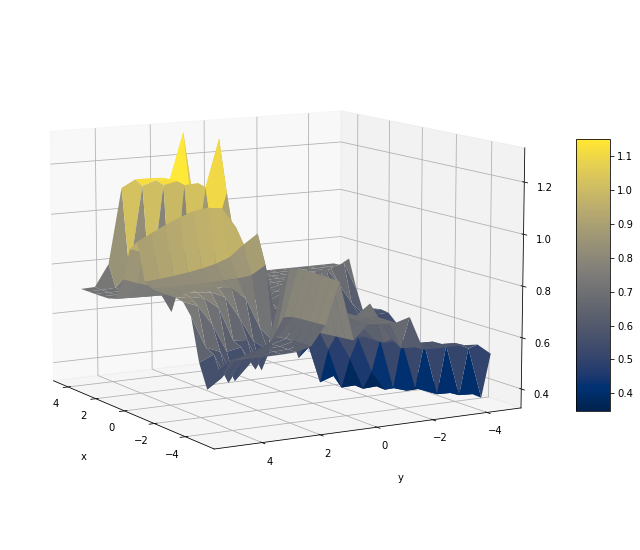

In [246]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X_plot, Y_plot, Z_plot, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
ax.view_init(10,150)
plt.show()
